## **Business Background**
The supermarket is facing several challenges, particularly due to shifts in customer behavior and expectations. To align with customer preferences, supermarkets must undergo a transformation. If handled effectively, these challenges can open new opportunities for supermarkets and customer product companies to sustain profitability and satisfy customer demands.

By analyzing detailed customer data on segmentation, product purchasing history, performance of the marketplace or store, responses to marketing campaigns, and acceptance of complaints, the supermarket aims to set strategies `to gain customer loyalty, increase sales, and optimize promotion to boost supermarket profit.`

## **Problem**

**Customer Segmentation**
1. What is the total number of customers? 
2. Which group (Age_Group, Education, Marital_Status, Income, and Child_Status) has the highest and lowest total number of customers? 

**Product Sales**
1. How much of customers who are active and passive in making purchases? 
2. Is there a correlation between active/passive customers and filing complaints? 
3. What type of product has the highest and lowest total sales?
4. Is there a correlation between Income and sales of each product type? 
5. Is there a correlation between Age_Group and sales of each product type? 

**Store & Marketplace Performance**
1. Which of the Website, Catalog, and Store has the highest and lowest percentage of total purchases?
2. What is the total purchases based on Age_Group for each marketplace/store?
3. What is total number of website visits in the last month?
4. Is there a correlation between website visit frequency and the number of purchases via the website? 

**Promotion Effectiveness**
1. Which campaign yields the highest and lowest accepted offer customers? 
2. What is the total purchase of each product type obtained from each type of campaign? 
3. Is there a correlation between NumDealsPurchases (purchases with discounts) and number purchases in each place?  

**Complaint Handling**
1. How much the total of customers with complain and without complain?
2. Which customers group (based on Age_Group, Education, Income, and Child_Status) frequently complains? 
3. What is the total purchase from customers who complain for each product type?  
4. What is the total number of purchase from customers who complain for each type of marketplace (Website, Catalog, and Store)?

## **Library Importing**

In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as sc

import warnings
warnings.filterwarnings("ignore")

## **DATA CLEANING**

In [2]:
# Read Dataset
df = pd.read_csv('Supermarket Customers.csv', delimiter='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Data Dictionary / Column Description:

**People**:
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

**Place**
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalog
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to the company’s website in the last month

In [3]:
# Check total of rows and columns
df.shape

(2240, 29)

In [4]:
# Check Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [6]:
# Converting Dt_Customer to Datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [7]:
df['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [8]:
df['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

**Check Unused Column**

In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Delete Unused Column
--> Z_CostContact and Z_Revenue Columnns not be used in data analysis and there are not included in the Data Dictionary

In [10]:
# Drop Column
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

**Handling Missing Value**

In [11]:
# Check Missing Value
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [12]:
# Checking missing value in Income Column

df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,1,7,6,0,0,0,0,0,0,0


In the dataset, there are 24 rows of missing values in the Income Column.

<Axes: xlabel='Income', ylabel='Density'>

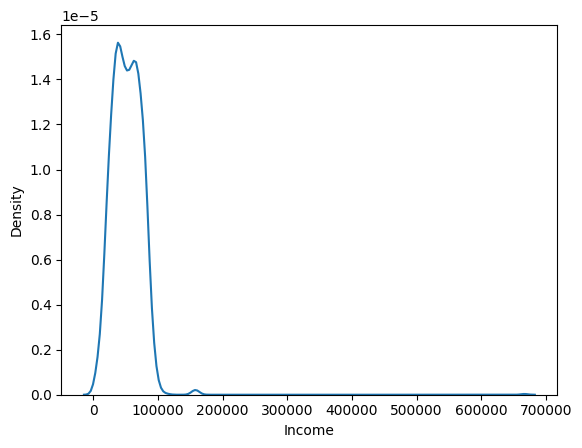

In [13]:
# Check distribution of Income to determine use median/mean for fill missing value
sns.kdeplot(df['Income'])

- Need to be `handled by inputting the median of the Income data because Income data is not normally distributed`.

- Find the strongest correlation of income with the other columns may be correlated ('Education' and 'Age') in data set to fill the missing value.

In [14]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

**Feature Engineering: Education_Lvl**

In [15]:
# Insert of new column to convert from Education to number for correlation analysis needs
df['Education']
def education_lvl(x) :
    if x == 'Basic' :
        return 1
    if x == 'Graduation' :
        return 2
    if x == '2n Cycle' or 'Master' :
        return 3
    else :
        return 4
df['Education_Lvl'] = df['Education'].apply(education_lvl)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_Lvl
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,3


**Feature Engineering : Age**

In [16]:
# Covert datatype to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Insert New Column (Age)
df['Age']=(df['Dt_Customer'].dt.year - df['Year_Birth'])


In [17]:
df['Age'].describe()

count    2240.000000
mean       44.222321
std        12.022855
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Age, dtype: float64

**Feature Engineering: Age_Group**

**Range of Age based on Group with min Age is 13 and max Age is 75**

Age Range based on : 
https://integrishealth.org/resources/on-your-health/2015/october/stages-of-life-health-for-every-age#:~:text=Teen%20%3D%2013%2D19%20yrs,Senior%20Adult%20%3D%2060%2B
- 13 <= Age < 20 as 'Teen'
- 20 <= Age < 40 as 'Adult'
- 40 <= Age < 60 as 'Middle Age Adult'
- 60 <= Age < 75 as 'Senior Adult / Elder'

In [18]:
# Grouping Age and Insert new column
age_range = [13, 20, 40, 60, 75]
age_labels = ['Teen','Adult', 'Middle Age Adult', 'Elder']
df['Age_Group'] = pd.cut(df['Age'], bins=age_range, labels=age_labels, right=False)

# Custom Age_Group in symbol
def agegroup_inSymbol(x) :
    if x == 'Teen' :
        return 1
    elif x == 'Adult' :
        return 2
    elif x == 'Middle Age Adult' :
        return 3
    else :
        return 4
df['AgeGroup_inSymbol'] = df['Age_Group'].apply(agegroup_inSymbol)

In [19]:
# Check p-value of Age
sc.shapiro(df['Age'])

ShapiroResult(statistic=0.9762152780995612, pvalue=7.260747018196546e-19)

<Axes: xlabel='Age', ylabel='Density'>

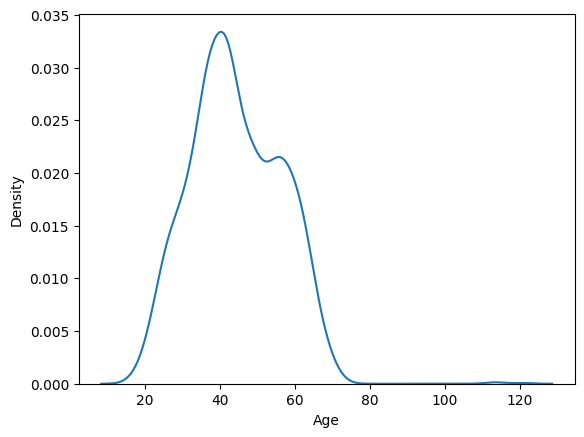

In [20]:
# Check distribution of Age
sns.kdeplot(df['Age'])

Based on kdeplot and P-Value < 0.05 indicates the data is not normally distributed so the `non-parametric correlation test (Spearman)` will be used.

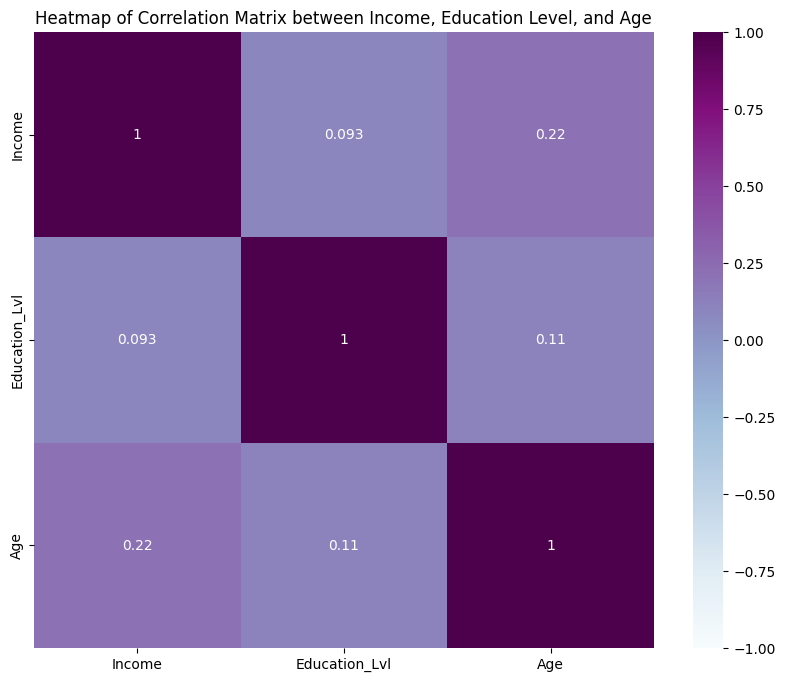

In [21]:
# Find the strongest correlation of income to determine the new missing value
corr_income= df[['Income', 'Education_Lvl', 'Age']].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_income, annot=True, cmap='BuPu', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix between Income, Education Level, and Age')
plt.show()

The correlation between Age and Income is stronger than the correlation between Education and Income. `Use median of income based on age to fill the missing value`.

In [22]:
# Find median income by age
median_income = df['Income'].groupby(df['Age']).median()
median_income

Age
16      7500.0
17     81937.0
18     80685.0
19     52993.5
20     72354.0
        ...   
72     93027.0
73     51141.0
113    36640.0
114    83532.0
121    60182.0
Name: Income, Length: 61, dtype: float64

In [23]:
# Median income by age group
income_median = df.groupby(['Age'])['Income'].transform('median')

# Fill missing value in Income Column
df["Income"].fillna(income_median, inplace=True)
df["Income"]=round(df['Income']).astype(int)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Education_Lvl          0
Age                    0
Age_Group              3
AgeGroup_inSymbol      3
dtype: int64

In [24]:
df[df['Age_Group'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_Lvl,Age,Age_Group,AgeGroup_inSymbol
192,7829,1900,2n Cycle,Divorced,36640,1,0,2013-09-26,99,15,...,0,0,0,0,1,0,3,113,NaN,NaN
239,11004,1893,2n Cycle,Single,60182,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,3,121,NaN,NaN
339,1150,1899,PhD,Together,83532,0,0,2013-09-26,36,755,...,0,1,0,0,0,0,3,114,NaN,NaN


There are still 3 rows of missing values ​​in the Age_Group column, because the ages (113, 121, and 114 years) > the average human age (75 years) and the age range in the Age_Group column that has been created
. These data may be outlier data.

**Handling Outliers**

In [25]:
# Check Age Column Detail
df['Age'].describe()

count    2240.000000
mean       44.222321
std        12.022855
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Age, dtype: float64

The maximum age exceeds the average human lifespan (75 years old), there `may be outlier data in 'Age' Column'. 'Other column that may have outliers --> 'Income' and 'Recency')` 

--> checking the distribution of outliers and eliminating them

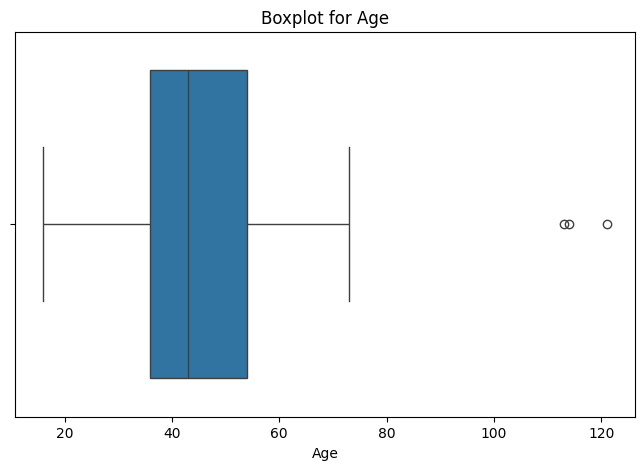

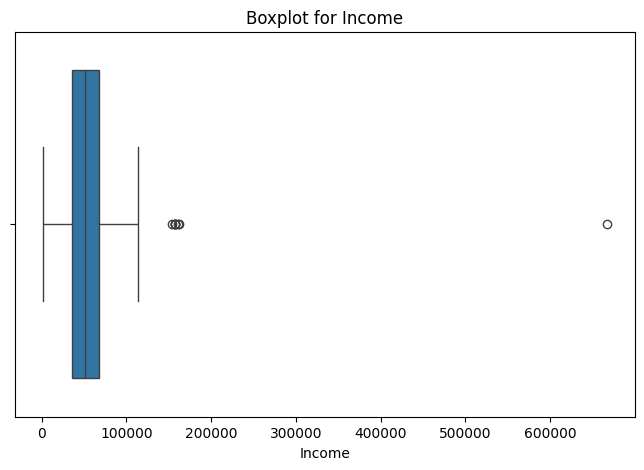

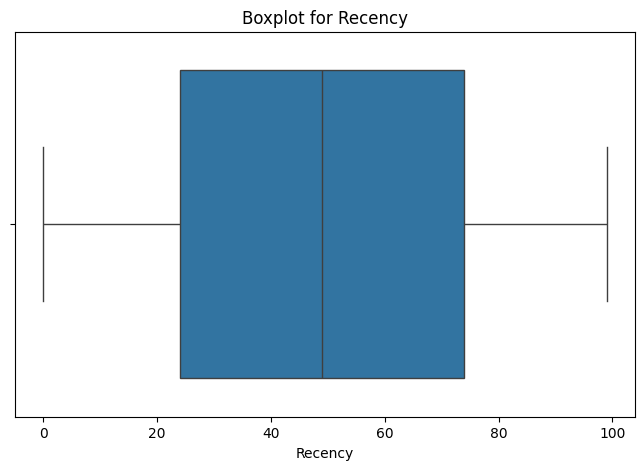

In [26]:
# Check Outlier
for col, column in enumerate(['Age', 'Income', 'Recency']):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

From the boxplot, it is known that the `'Age' and 'Income' columns need to have outliers removed` because data that is outside the upper limit causes misinterpretation of the characteristics or segmentation of the majority of consumers (data that is within the upper limit and lower).

In [27]:
# Remove Outlier
for column in ['Age', 'Income']:
    # Count IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Determine upper and lower limits for outliers
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Delete outlier
    df = df[(df[column] >= lower) & (df[column] <= upper)]

df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Education_Lvl          0
Age                    0
Age_Group              0
AgeGroup_inSymbol      0
dtype: int64

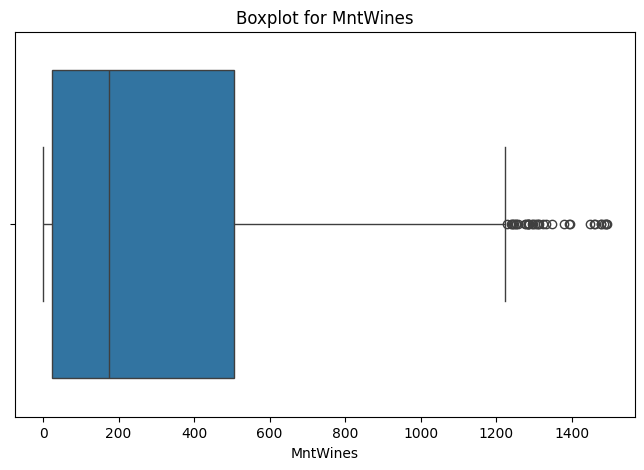

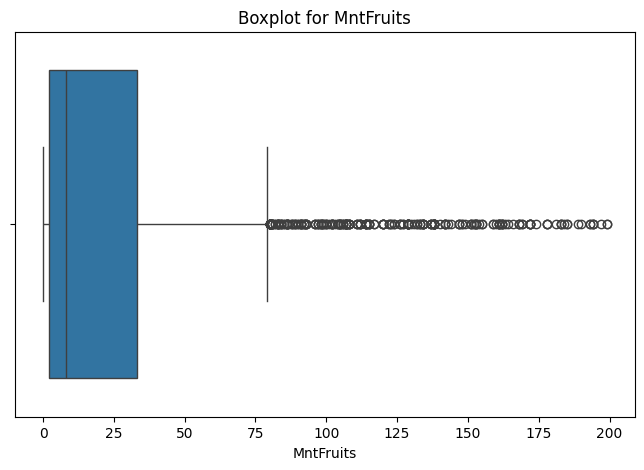

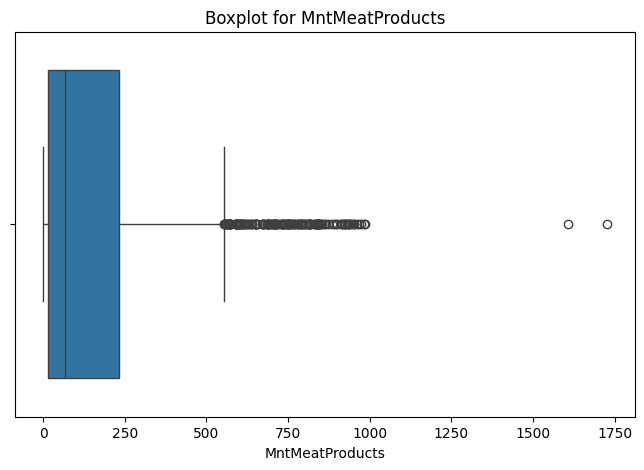

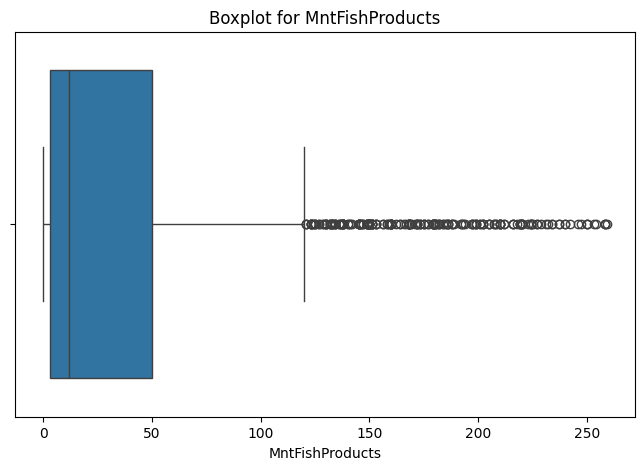

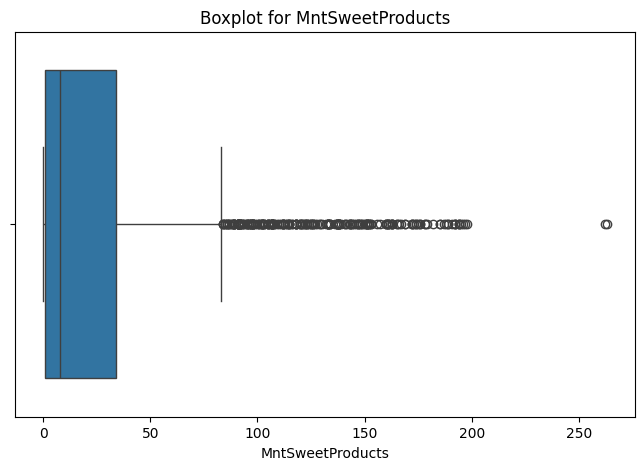

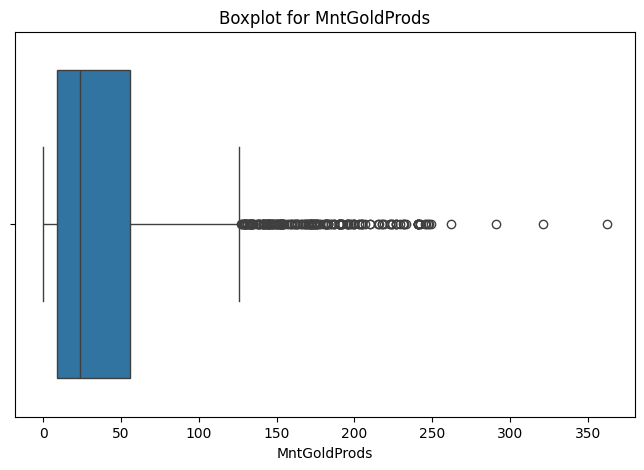

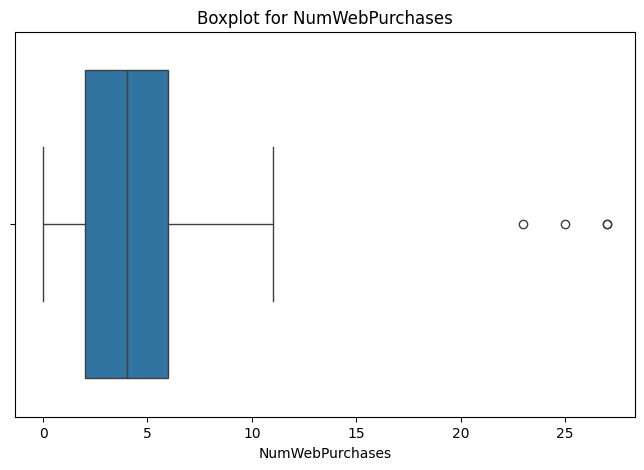

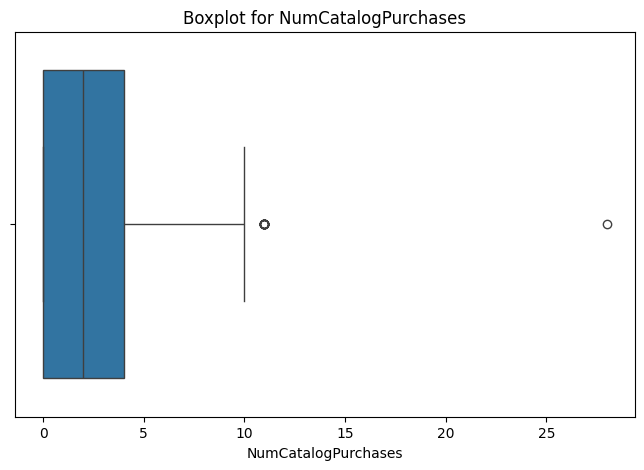

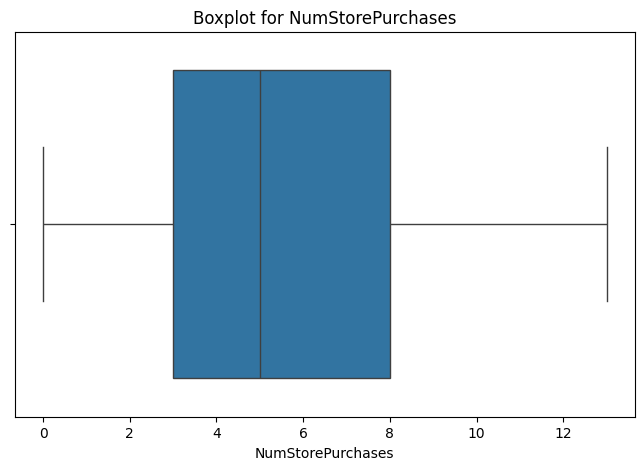

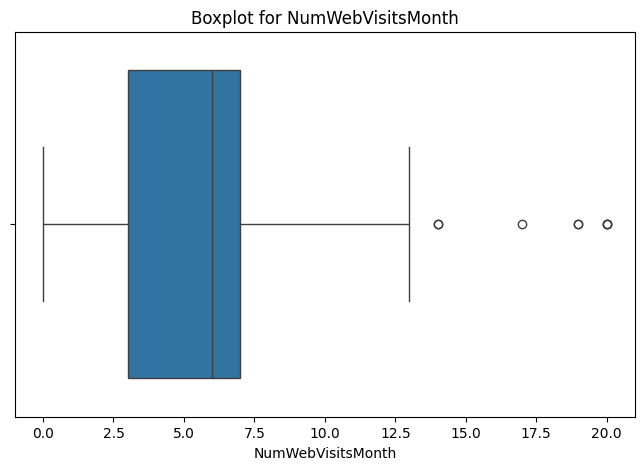

In [28]:
# Check Outlier in other columns about product and place
for col, column in enumerate(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

Outliers in `columns about product and place` can provide valuable insights about consumer preferences by identifying and understanding extreme values.

--> `outliers doesn't need to be removed`

**Feature Engineering: Income_Group**

In [29]:
# Check min and max income on data
df['Income'].describe()

count      2229.00000
mean      51603.92463
std       20617.25534
min        1730.00000
25%       35388.00000
50%       51287.00000
75%       68118.00000
max      113734.00000
Name: Income, dtype: float64

**Range of Income**

Income Range based on : 
https://blogs.worldbank.org/en/opendata/world-bank-country-classifications-by-income-level-for-2024-2025
- 0 - < 1146 as 'Low'
- 1146 - < 4516 as 'Lower Middle'
- 4516 - < 14006 as 'Upper Middle'
- 14006 < 113735 as 'High'

In [30]:
# Grouping Income and Insert new column
income_range = [0, 1146, 4516, 14006, 113735]
income_labels = ['Low','Lower Middle', 'Upper Middle', 'High']
df['Income_Group'] = pd.cut(df['Income'], bins=income_range, labels=income_labels, right=False)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_Lvl,Age,Age_Group,AgeGroup_inSymbol,Income_Group
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,0,0,0,0,1,2,55,Middle Age Adult,3,High
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,0,0,0,0,0,2,60,Elder,4,High
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,0,0,0,0,0,2,48,Middle Age Adult,3,High
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,0,0,0,0,0,2,30,Adult,2,High
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,33,Adult,2,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,2013-06-13,46,709,...,0,0,0,0,0,2,46,Middle Age Adult,3,High
2236,4001,1946,PhD,Together,64014,2,1,2014-06-10,56,406,...,0,1,0,0,0,3,68,Elder,4,High
2237,7270,1981,Graduation,Divorced,56981,0,0,2014-01-25,91,908,...,0,0,0,0,0,2,33,Adult,2,High
2238,8235,1956,Master,Together,69245,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,58,Middle Age Adult,3,High


**Feature Engineering: Active_Customer**

1. Active Customer: the last time they made a purchase was <= 90 days
2. Passive Customer: the last time they made a purchase was > 90 days

In [31]:
df['Active_Cust'] = np.where(df['Recency']<= 90, 'Active', 'Passive')

**Feature Engineering : Child_Status**

Child_Status is used to indicate whether the customer has children or not and summarizes the kidhome and teenhome columns at once.

In [32]:
# Insert new column
df['Child_Status'] = np.where(df['Kidhome']+df['Teenhome'] == 0, 'Without Child', 'With Child')

**Replace Inconsistent and Faulty Data** : Marital_Status

In [33]:
# Check Value
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [34]:
# Replace 'Alone', 'Absurd', and 'YOLO' to 'Single'
def replace_status(status):
    change = ['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']
    status.loc[status.isin(change)] = 'Single'

replace_status(df['Marital_Status'])

In [35]:
# Replace 'Together' to 'Married'
df['Marital_Status'] = df['Marital_Status'].replace('Together','Married')

In [36]:
# Check unique value of marital status
df['Marital_Status'].unique()

array(['Single', 'Married'], dtype=object)

**Replace Inconsistent and Faulty Data** : Education

In [37]:
# Replace '2n Cycle' to 'Master'
df['Education'] = df['Education'].replace('2n Cycle','Master')

#Check unique value of education
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

**Delete Unused Column**

The Year_Birth and Dt_Customer information have been made into new columns (Age) 
--> drop Year_Birth and Dt_Customer columns

In [38]:
df = df.drop(['Year_Birth', 'Dt_Customer'], axis=1)

**Check Duplicate**

In [39]:
# Check Duplicate
duplicate = df[df.duplicated()]
duplicate

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Response,Education_Lvl,Age,Age_Group,AgeGroup_inSymbol,Income_Group,Active_Cust,Child_Status


No Data Duplicated

## **Check and Save Clean Data**

In [40]:
df

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Response,Education_Lvl,Age,Age_Group,AgeGroup_inSymbol,Income_Group,Active_Cust,Child_Status
0,5524,Graduation,Single,58138,0,0,58,635,88,546,...,0,0,1,2,55,Middle Age Adult,3,High,Active,Without Child
1,2174,Graduation,Single,46344,1,1,38,11,1,6,...,0,0,0,2,60,Elder,4,High,Active,With Child
2,4141,Graduation,Married,71613,0,0,26,426,49,127,...,0,0,0,2,48,Middle Age Adult,3,High,Active,Without Child
3,6182,Graduation,Married,26646,1,0,26,11,4,20,...,0,0,0,2,30,Adult,2,High,Active,With Child
4,5324,PhD,Married,58293,1,0,94,173,43,118,...,0,0,0,3,33,Adult,2,High,Passive,With Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223,0,1,46,709,43,182,...,0,0,0,2,46,Middle Age Adult,3,High,Active,With Child
2236,4001,PhD,Married,64014,2,1,56,406,0,30,...,0,0,0,3,68,Elder,4,High,Active,With Child
2237,7270,Graduation,Single,56981,0,0,91,908,48,217,...,0,0,0,2,33,Adult,2,High,Passive,Without Child
2238,8235,Master,Married,69245,0,1,8,428,30,214,...,0,0,0,3,58,Middle Age Adult,3,High,Active,With Child


In [41]:
df.isna().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Education_Lvl          0
Age                    0
Age_Group              0
AgeGroup_inSymbol      0
Income_Group           0
Active_Cust            0
Child_Status           0
dtype: int64

In [42]:
# Save DataFrame as CSV file
df.to_csv('clean_Supermarket Customers.csv')

## **Data Analysis**

**Consumer Segmentation**
1. What is the total number of customers?

In [43]:
# Total number of customer == total number of rows
Total_Consumer = df.shape[0]
Total_Consumer

2229

Total number of customers is 2229.

2. Which group (Age_Group, Education, Marital_Status, Income, Child_Status, and Income_Group) has the highest and lowest total number of customers?

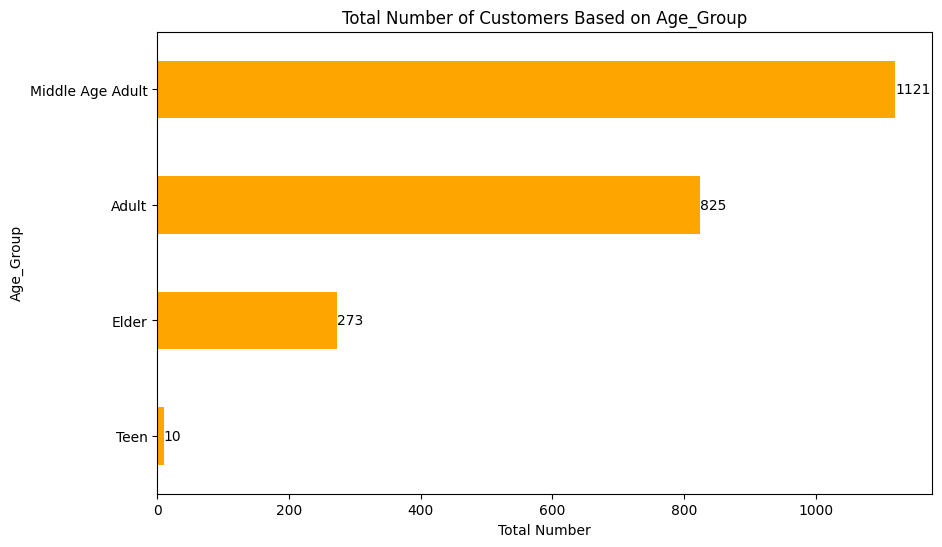

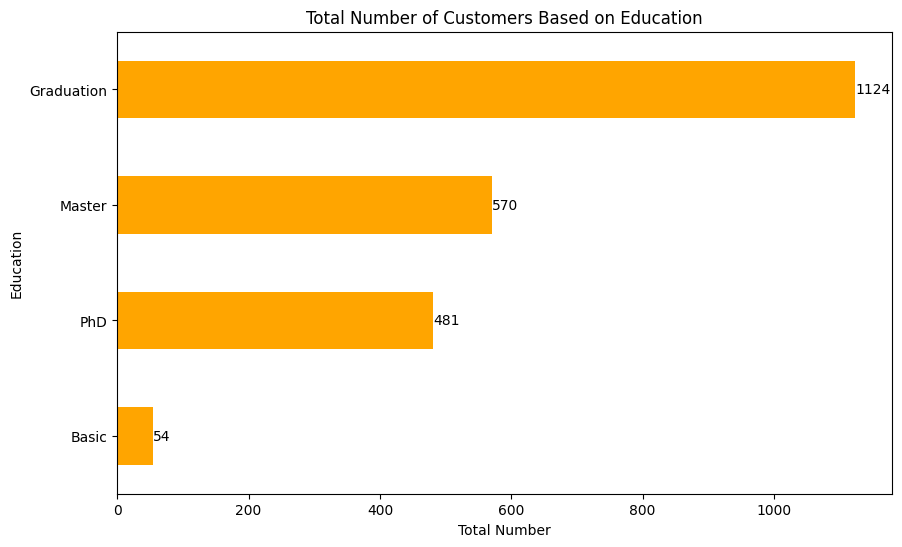

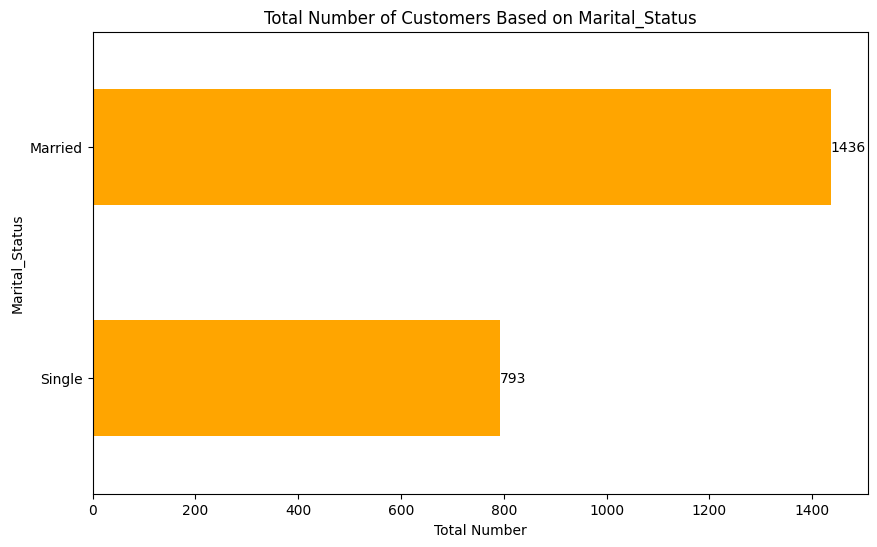

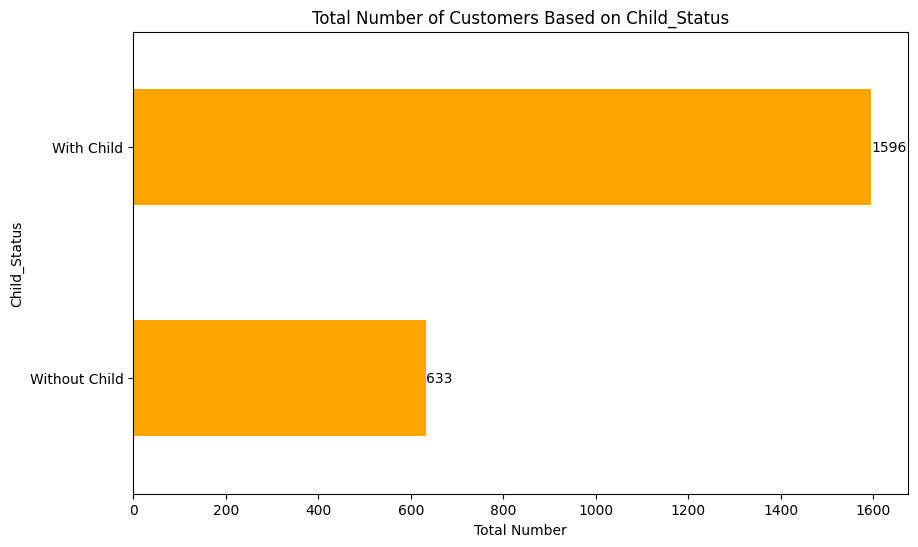

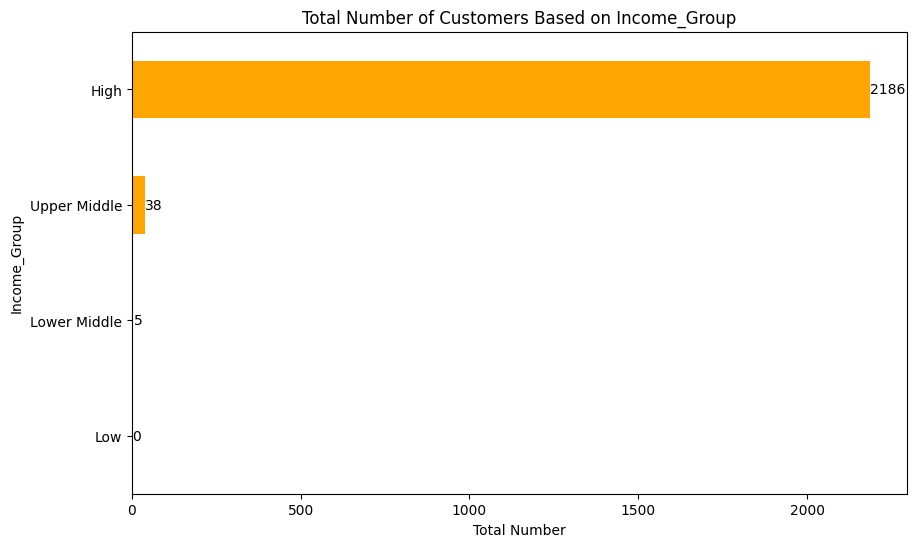

In [44]:
# List of Categories Customer
listcat = ['Age_Group', 'Education', 'Marital_Status', 'Child_Status', 'Income_Group']

# Iterate through each categories
for numbercat, allcat in enumerate(listcat, start=1):
    # Count customers each categories
    cat = df[allcat].value_counts()
    cat = cat.sort_values(ascending=True)

    # Create Barchart
    plt.figure(figsize=(10, 6))

    ax_cat = cat.plot(kind='barh', color='orange')
    plt.xlabel('Total Number')
    plt.ylabel(f'{allcat}')
    plt.title(f'Total Number of Customers Based on {allcat}')

    for barcat in ax_cat.containers:
        ax_cat.bar_label(barcat)

Customer group with `the highest total number` :
- Middle Age Adult (40 - 59 years old)
- Graduation as last education (bachelor’s degree) 
- Married as marital status
- living with child
- High Income (14006 - 113734)

Customer group with `the lowest total number` :
- Teen (13 - 20 years old)
- Basic as last education
- Single as marital status
- living without child
- Lower Middle Income (1146 - 4515)

**Product Sales**
1. How much of customers who are active and passive in making purchases? 

In [45]:
# Count through total number of rows
active = df[df['Active_Cust'] == 'Active']['Active_Cust'].count()
active

2033

Total number of active customer (made purchases in the last 90 days) is 2033.

In [46]:
# Count through total number of rows
passive = df[df['Active_Cust'] == 'Passive']['Active_Cust'].count()
passive

196

Total number of passive customer (not made purchases in the last 90 days) is 196.

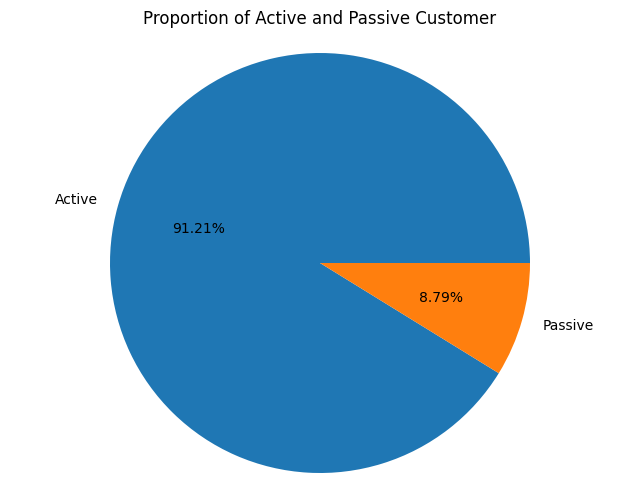

In [47]:
# Create y and labels
all_cust = pd.Series({
    'Active': active,
    'Passive': passive,
})
label_cust = ['Active', 'Passive']

plt.figure(figsize=(8,6))
all_cust.plot.pie(y= all_cust,
                  figsize=(8,6),
                  labels = label_cust,
                  autopct = '%.2f%%'
                  )
plt.axis('equal')
plt.title('Proportion of Active and Passive Customer')
plt.show()

Percentage of Active Customer is higher than Passive Customer, 91.21% is Active Customer, while 8.79% is Passive Customer.

2. Is there a correlation between active/passive customers and filing complaints? `Correlation Test - Inferential Statistics`

In [48]:
# Insert of new column to convert from Active/Passive customer to number for correlation analysis needs
df['Active_Cust']
def activeCust_inSymbol(x) :
    if x == 'Active' :
        return 1
    if x == 'Passive' :
        return 2
df['ActiveCust_inSymbol'] = df['Active_Cust'].apply(activeCust_inSymbol)

df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Response,Education_Lvl,Age,Age_Group,AgeGroup_inSymbol,Income_Group,Active_Cust,Child_Status,ActiveCust_inSymbol
0,5524,Graduation,Single,58138,0,0,58,635,88,546,...,0,1,2,55,Middle Age Adult,3,High,Active,Without Child,1
1,2174,Graduation,Single,46344,1,1,38,11,1,6,...,0,0,2,60,Elder,4,High,Active,With Child,1
2,4141,Graduation,Married,71613,0,0,26,426,49,127,...,0,0,2,48,Middle Age Adult,3,High,Active,Without Child,1
3,6182,Graduation,Married,26646,1,0,26,11,4,20,...,0,0,2,30,Adult,2,High,Active,With Child,1
4,5324,PhD,Married,58293,1,0,94,173,43,118,...,0,0,3,33,Adult,2,High,Passive,With Child,2


In [49]:
# Check p-value of 'ActiveCust_inSymbol'
sc.shapiro(df['ActiveCust_inSymbol'])

ShapiroResult(statistic=0.3175549794461282, pvalue=9.442778292194608e-68)

In [50]:
# Check p-value of 'Complain'
sc.shapiro(df['Complain'])

ShapiroResult(statistic=0.06611593961501805, pvalue=6.018715514713534e-74)

P-Value < 0.05 indicates the data is not normally distributed so the `non-parametric correlation test (Spearman)` will be used.

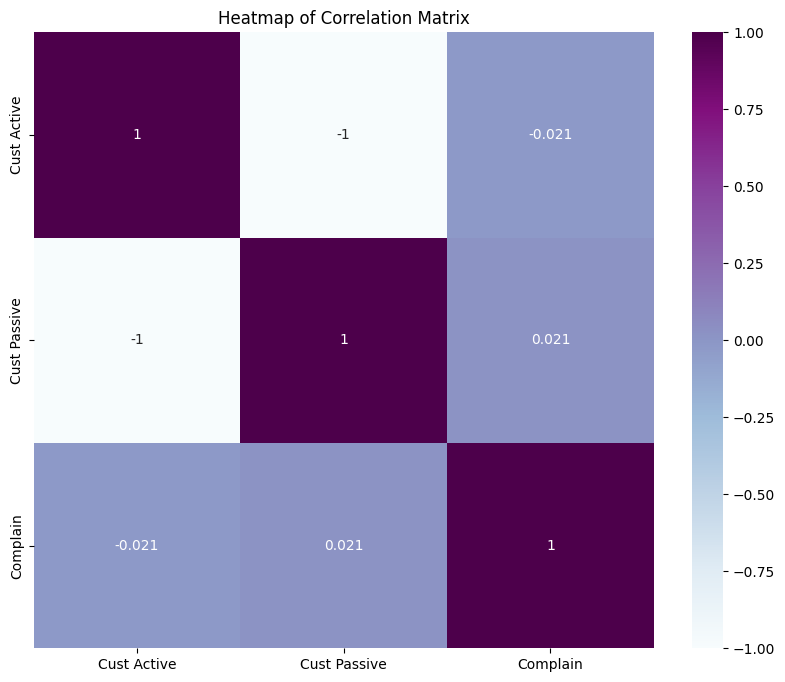

In [51]:
# Find the correlation 
# Create new columns for the conditions
df['Cust Active'] = (df['ActiveCust_inSymbol'] == 1).astype(int)
df['Cust Passive'] = (df['ActiveCust_inSymbol'] == 2).astype(int)

corr_matrix= df[['Cust Active', 'Cust Passive', 'Complain']].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

The strength of the correlation : 
https://datatab.net/tutorial/spearman-correlation

- 0.0 - <0.1	 -->   no correlation
- 0.1 - <0.3	 -->  low correlation
- 0.3 - <0.5	 -->  medium correlation
- 0.5 - <0.7	 -->   high correlation
- 0.7 - 1	 -->   very high correlation

- Coefficient between -1 and less than 0, there is a negative correlation 
- Coefficient greater than 0 and greater than 1, there is a positive correlation.

---

Based on heatmap, not only `no correlation` between complain and active customer, but also `no correlation` between complain and active customer (The increase in complaints not affecting on the increase in active or passive customers).

3. What type of product has the highest and lowest total sales?

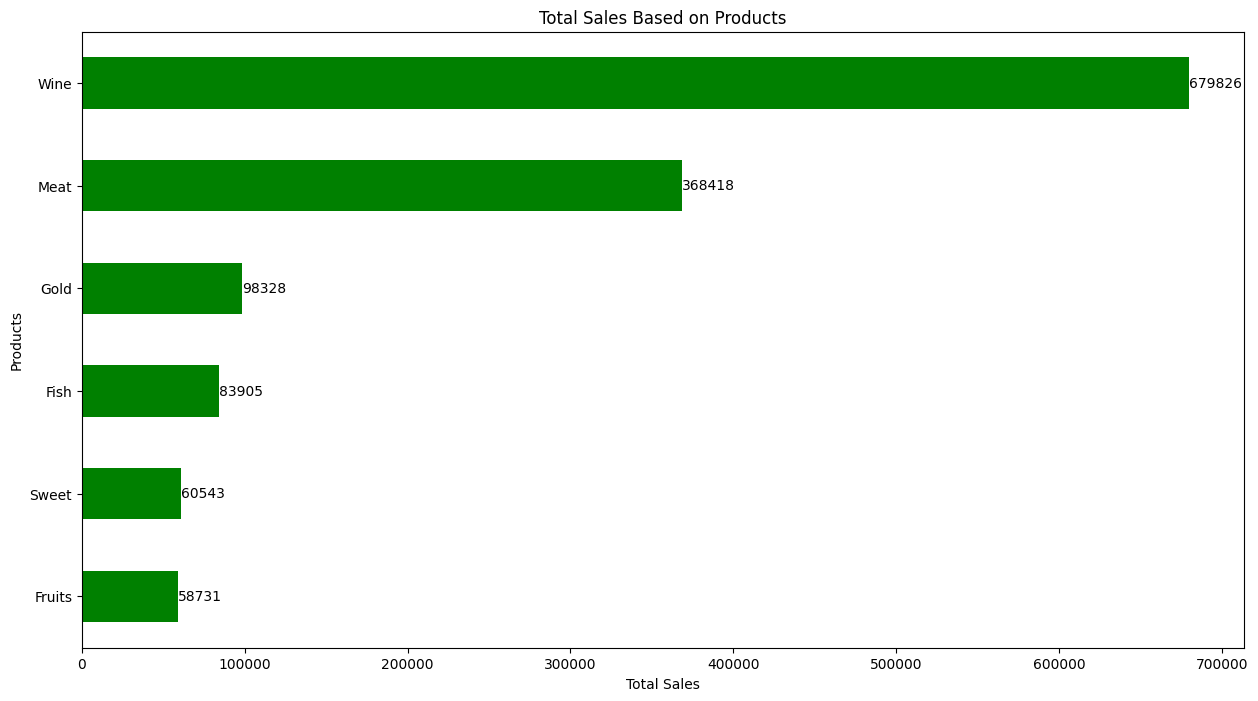

In [52]:
sum_wine = df['MntWines'].sum()
sum_fruit = df['MntFruits'].sum()
sum_meat = df['MntMeatProducts'].sum()
sum_fish= df['MntFishProducts'].sum()
sum_sweet = df['MntSweetProducts'].sum()
sum_gold = df['MntGoldProds'].sum()

# Create a DataFrame for plotting
sum_prod = pd.Series({
    'Wine': sum_wine,
    'Fruits': sum_fruit,
    'Meat': sum_meat,
    'Fish': sum_fish,
    'Sweet': sum_sweet,
    'Gold': sum_gold
})

plt.figure(figsize=(15, 8))

sum_prod = sum_prod.sort_values(ascending=True)

# Create the bar plot
ax = sum_prod.plot(kind='barh', color='green')
plt.xlabel('Total Sales')
plt.ylabel('Products')
plt.title('Total Sales Based on Products')

# Label each bar with its value
for i in ax.containers:
    ax.bar_label(i)

plt.show()

- `Wine` as type of product that has `the highest`total sales, with a total sales of 679826.
- `Fruits` as type of product that has `the lowest` total sales, with a total sales of 58731.

The order of total product sales from highest to lowest is Wine, Meat, Gold, Fish, Sweet, and Fruits.

4. Is there a correlation between Income and sales of each product type?

In [53]:
# Check p-value
prodNIncome = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]

for p in prodNIncome :
    p_val = sc.shapiro(df[p])
    print(f'{p} : {p_val}')

Income : ShapiroResult(statistic=0.9853237203124571, pvalue=2.2212111540403912e-14)
MntWines : ShapiroResult(statistic=0.8392199750157807, pvalue=8.724673975640146e-43)
MntFruits : ShapiroResult(statistic=0.6900330867227518, pvalue=2.1636358114098707e-53)
MntMeatProducts : ShapiroResult(statistic=0.7408740004465297, pvalue=2.239618912918326e-50)
MntFishProducts : ShapiroResult(statistic=0.7094366439642001, pvalue=2.713532459705065e-52)
MntSweetProducts : ShapiroResult(statistic=0.6876653966092641, pvalue=1.6036788211706203e-53)
MntGoldProds : ShapiroResult(statistic=0.7682730822666497, pvalue=1.5314079174609497e-48)


P-Value < 0.05 indicates the data is not normally distributed so the `non-parametric correlation test (Spearman)` will be used.

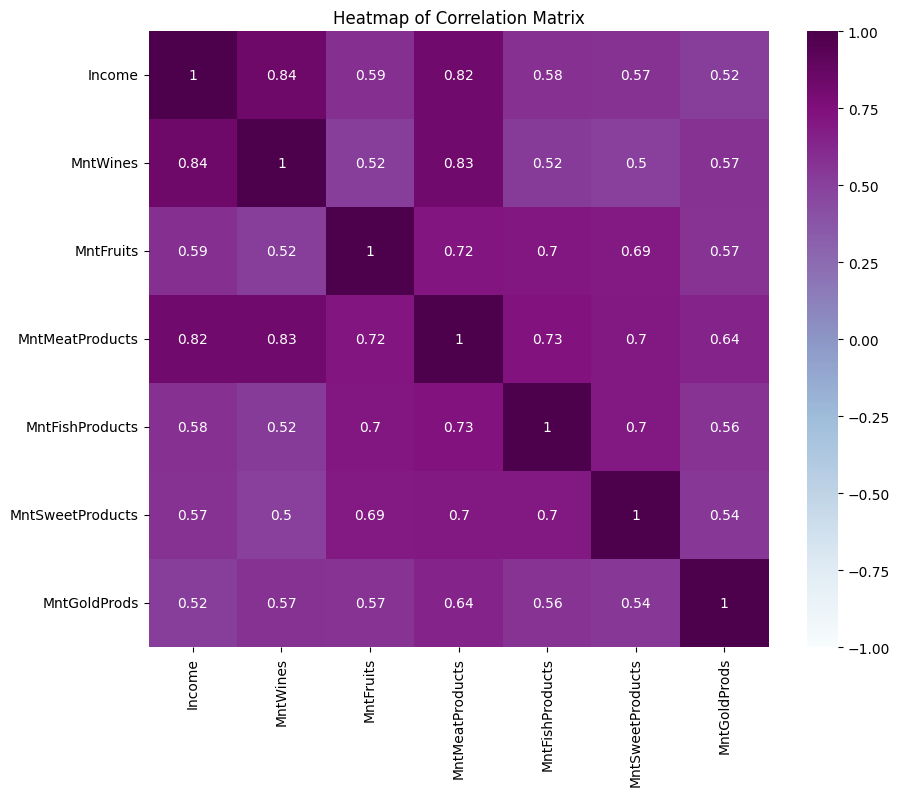

In [54]:
# Find the correlation
corr_matrix= df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

The strength of the correlation : 
https://datatab.net/tutorial/spearman-correlation

- 0.0 - <0.1	 -->   no correlation
- 0.1 - <0.3	 -->  low correlation
- 0.3 - <0.5	 -->  medium correlation
- 0.5 - <0.7	 -->   high correlation
- 0.7 - 1	 -->   very high correlation

- Coefficient between -1 and less than 0, there is a negative correlation 
- Coefficient greater than 0 and greater than 1, there is a positive correlation.

---

- The highest correlation occurs between Income and Wine Sales, while the lowest correlation occurs between Income and Gold Sales.
- Between Income & Wine Sales and between Income & Meat Sales have a very high positive correlation.
- Income & selling fruit, income & selling fish, income & selling sweets, and income & selling gold have a high positive correlation.
- The higher Customer Income will be followed by higher sales of all products.

5. Is there a correlation between Age_Group and sales of each product type?

In [55]:
# Check p-value
prodNAgeGroup = ['AgeGroup_inSymbol', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]

for pA in prodNAgeGroup :
    p_val_Age = sc.shapiro(df[pA])
    print(f'{pA} : {p_val_Age}')

AgeGroup_inSymbol : ShapiroResult(statistic=0.7964598102412573, pvalue=1.8639844917345865e-46)
MntWines : ShapiroResult(statistic=0.8392199750157807, pvalue=8.724673975640146e-43)
MntFruits : ShapiroResult(statistic=0.6900330867227518, pvalue=2.1636358114098707e-53)
MntMeatProducts : ShapiroResult(statistic=0.7408740004465297, pvalue=2.239618912918326e-50)
MntFishProducts : ShapiroResult(statistic=0.7094366439642001, pvalue=2.713532459705065e-52)
MntSweetProducts : ShapiroResult(statistic=0.6876653966092641, pvalue=1.6036788211706203e-53)
MntGoldProds : ShapiroResult(statistic=0.7682730822666497, pvalue=1.5314079174609497e-48)


P-Value < 0.05 indicates the data is not normally distributed so the `non-parametric correlation test (Spearman)` will be used.

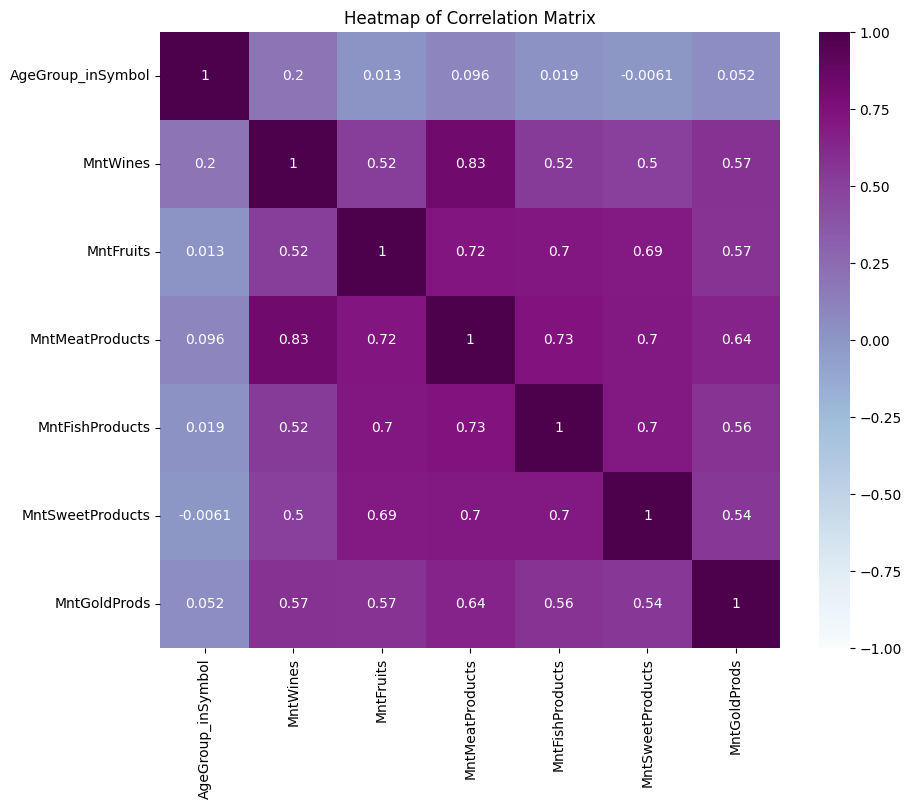

In [56]:
# Find the correlation
corr_matrix= df[['AgeGroup_inSymbol', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

The strength of the correlation : 
https://datatab.net/tutorial/spearman-correlation

- 0.0 - <0.1	 -->   no correlation
- 0.1 - <0.3	 -->  low correlation
- 0.3 - <0.5	 -->  medium correlation
- 0.5 - <0.7	 -->   high correlation
- 0.7 - 1	 -->   very high correlation

- Coefficient between -1 and less than 0, there is a negative correlation 
- Coefficient greater than 0 and greater than 1, there is a positive correlation.

---

- The highest correlation occurs between Age Group and Wine Sales, while the lowest correlation occurs between Age Group and Sweet Sales.
- Between Income & Wine Sales has a low positive correlation, others have no correlation.
- The higher Customer Age Group will be followed by higher sales of Wine.

**Store & Marketplace Performance**
1. Which of the Website, Catalog, and Store has the highest and lowest percentage of total purchases?

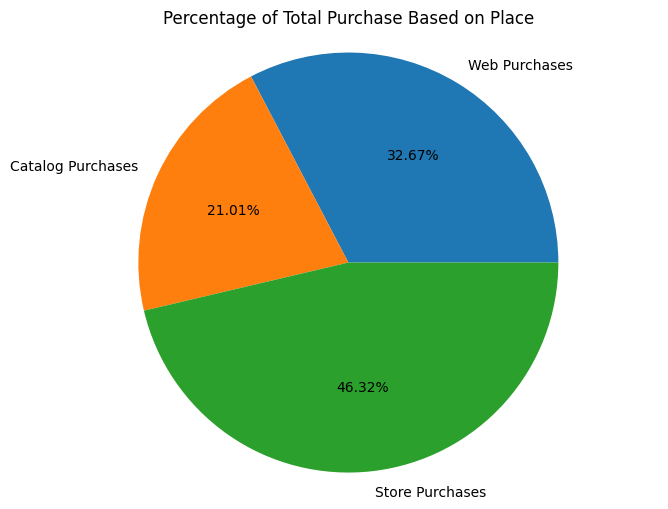

In [57]:
sum_web = df['NumWebPurchases'].sum()
sum_catalog = df['NumCatalogPurchases'].sum()
sum_store = df['NumStorePurchases'].sum()

# Create y and labels
sum_market = pd.Series({
    'Web': sum_web,
    'Catalog': sum_catalog,
    'Store': sum_store,
})
label_market = ['Web Purchases','Catalog Purchases', 'Store Purchases']

plt.figure(figsize=(8,6))
sum_market.plot.pie(y= sum_market,
                  figsize=(8,6),
                  labels = label_market,
                  autopct = '%.2f%%'
                  )
plt.axis('equal')
plt.title('Percentage of Total Purchase Based on Place')
plt.show()

`Store` being the place that has `the highest` percentage of total purchase, while `catalog` being the place that has `the lowest` percentage of total purchase.

2. What is the total purchase based on Age_Group for each marketplace/store?

In [58]:
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Age_Group']].groupby('Age_Group').sum()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Age_Group,,,
Teen,35,42,65
Adult,3052,1854,4455
Middle Age Adult,4795,3037,6633
Elder,1257,944,1803


- Store has the highest number purchases compared to other places among all age groups --> teen (65 purchases), Adult (4455 purchases), Middle Age Adult (6633 purchases), and Elder (1803 purchases).
- Web has the lowest number purchases (35 purchases) compared to other places among teen age group.
- Catalog has the lowest number purchases compared to other places among Adult (1854 purchases), Middle Age Adult (3037 purchases), and Elder (944 purchases) age group

3. What is total number of website visits in the last month?

In [59]:
# count total number of website visits in the last month
df['NumWebVisitsMonth'].sum()

11890

The total number of website visits last month is 11890.

4. Is there a correlation between website visit frequency and the number of purchases via the website? 

In [60]:
# Check p-value
webvisNpur = ['NumWebVisitsMonth', 'NumWebPurchases' ]

for wvp in webvisNpur :
    p_val_web = sc.shapiro(df[wvp])
    print(f'{wvp} : {p_val_web}')

NumWebVisitsMonth : ShapiroResult(statistic=0.928936676375098, pvalue=2.741408526661212e-31)
NumWebPurchases : ShapiroResult(statistic=0.8970004340350125, pvalue=2.7806318927241127e-36)


P-Value < 0.05 indicates the data is not normally distributed so the `non-parametric correlation test (Spearman)` will be used.

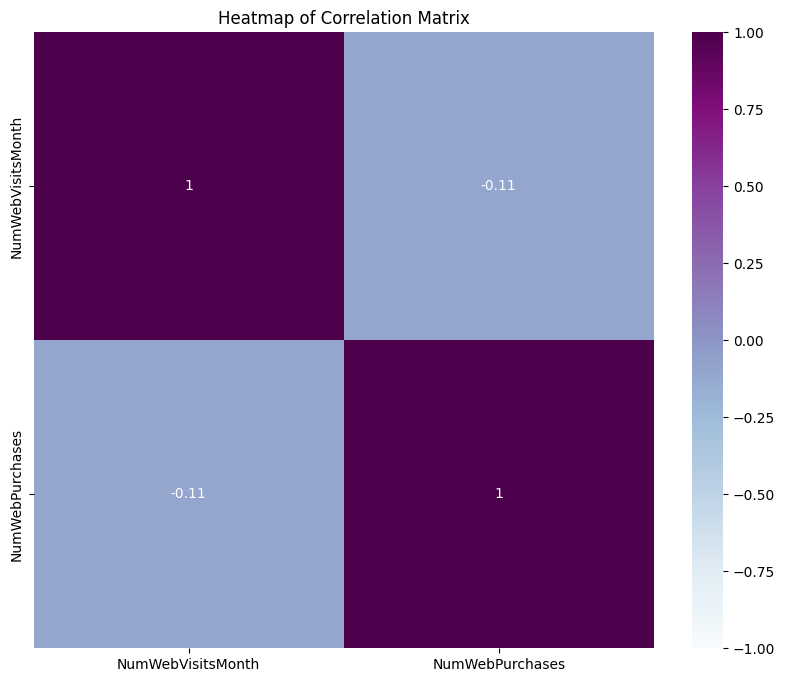

In [61]:
# Find the correlation
corr_matrix= df[['NumWebVisitsMonth', 'NumWebPurchases' ]].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

The strength of the correlation : 
https://datatab.net/tutorial/spearman-correlation

- 0.0 - <0.1	 -->   no correlation
- 0.1 - <0.3	 -->  low correlation
- 0.3 - <0.5	 -->  medium correlation
- 0.5 - <0.7	 -->   high correlation
- 0.7 - 1	 -->   very high correlation

- Coefficient between -1 and less than 0, there is a negative correlation 
- Coefficient greater than 0 and greater than 1, there is a positive correlation.

---

Based on heatmap, there is `low negative correlation` between frequency of website visit and the number of purchases via website. `Frequency of website visits does not guarantee that purchases will occur through the website.`

**Promotion Effectiveness**
1. Which campaign has the highest and lowest accepted offer customers?

In [62]:
# count total number of customer accepted of each campaign
cmp = {'Accepted Campaign 1' : df[df['AcceptedCmp1'] == 1].shape[0],
       'Accepted Campaign 2' : df[df['AcceptedCmp2'] == 1].shape[0],
       'Accepted Campaign 3' : df[df['AcceptedCmp3'] == 1].shape[0],
       'Accepted Campaign 4' : df[df['AcceptedCmp4'] == 1].shape[0],
       'Accepted Campaign 5' : df[df['AcceptedCmp5'] == 1].shape[0],
       'Accepted Campaign 6' : df[df['Response'] == 1].shape[0]
       }
campaign = pd.DataFrame(list(cmp.items()), columns=['Campaign', 'Count'])
campaign


,Campaign,Count
0,Accepted Campaign 1,144
1,Accepted Campaign 2,30
2,Accepted Campaign 3,163
3,Accepted Campaign 4,167
4,Accepted Campaign 5,162
5,Accepted Campaign 6,334


The latest campaign has the highest accepted offer customers, while campaign 2 has the lowest accepted offer customers. 

2. What is the total purchase of each product type obtained from each type of campaign? 

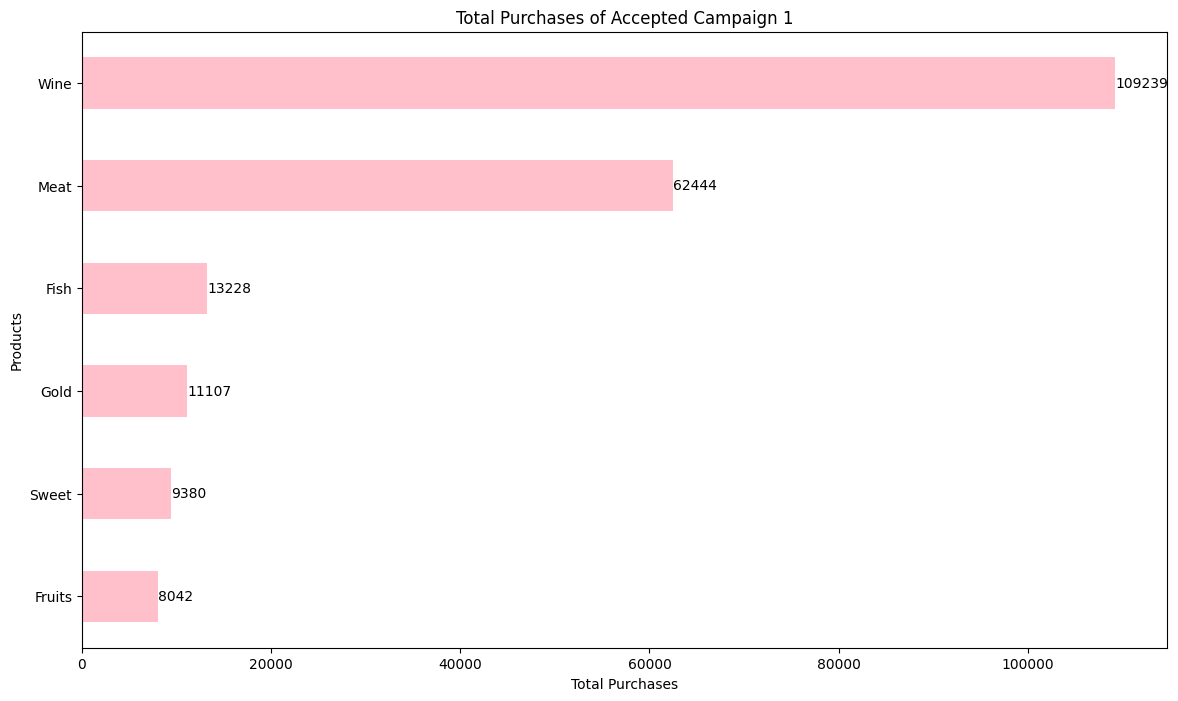

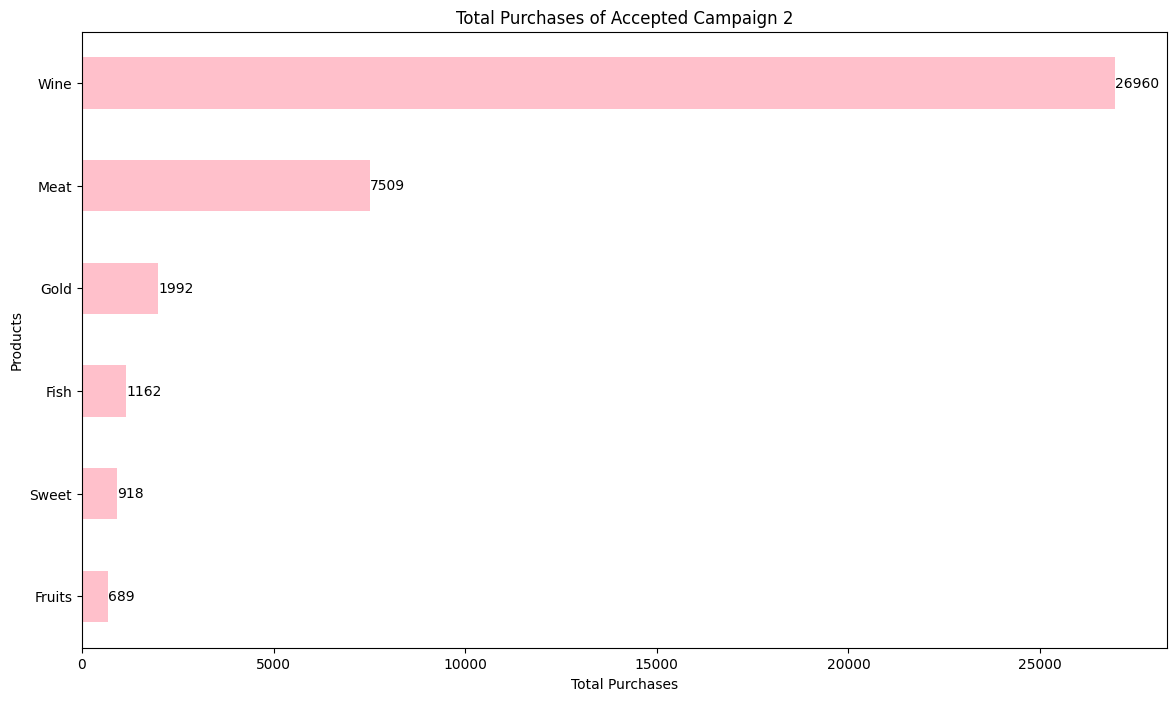

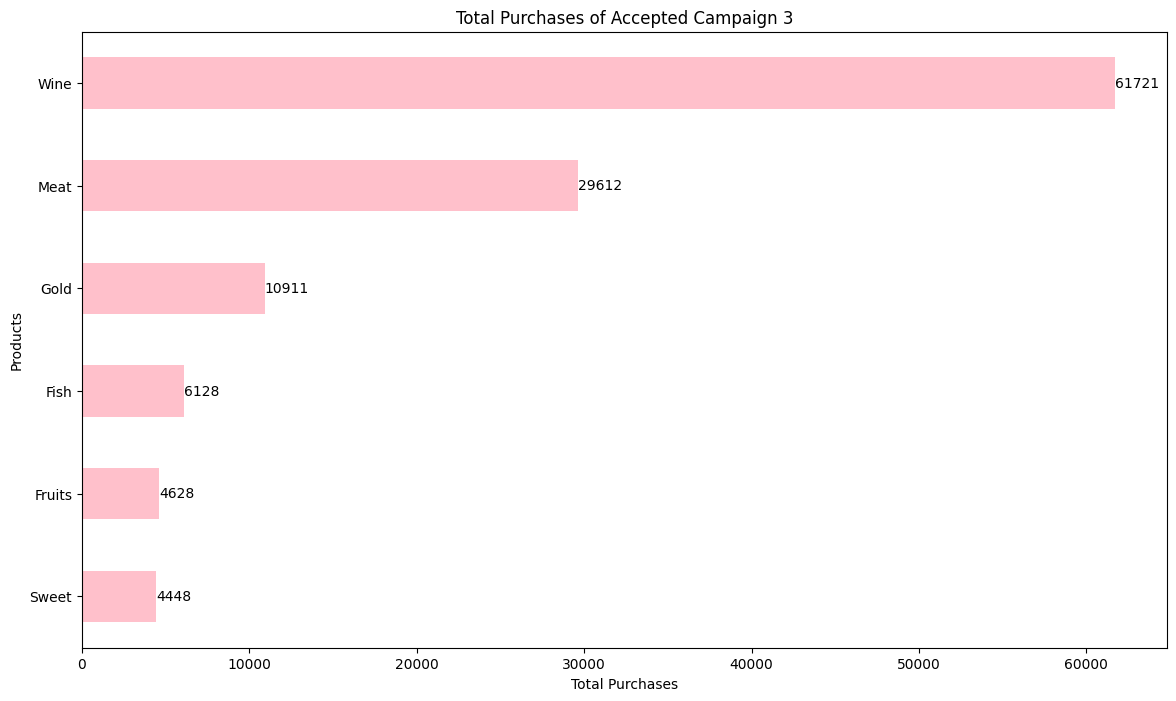

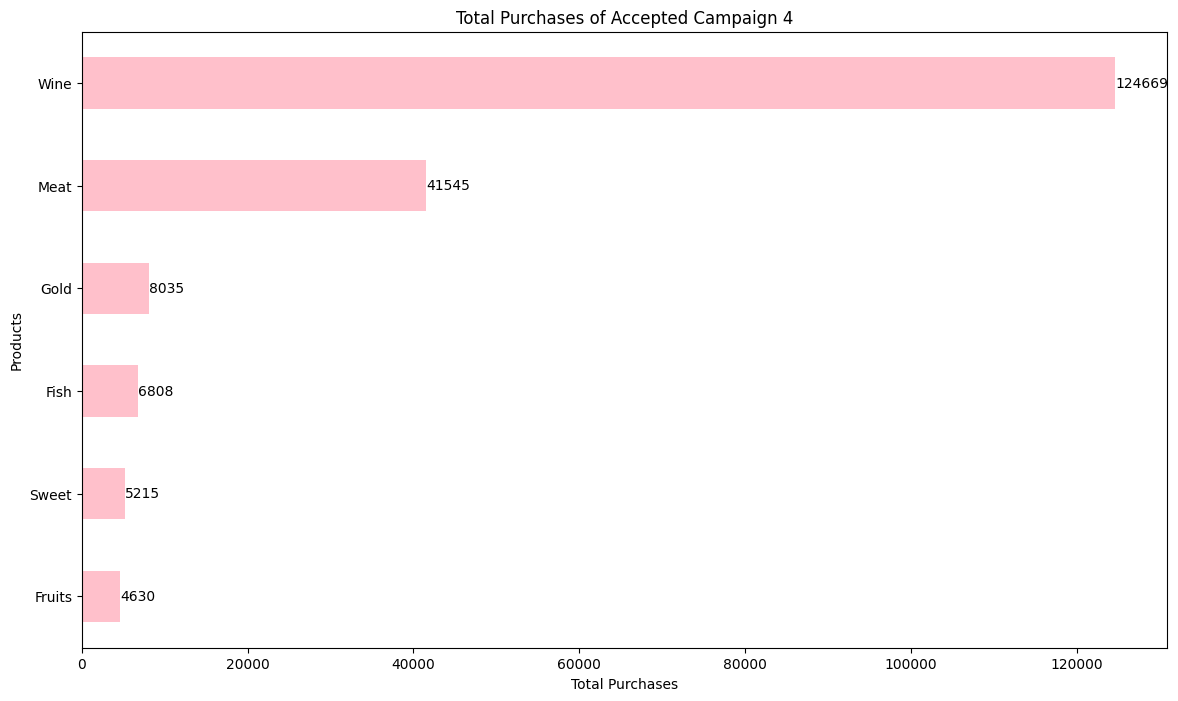

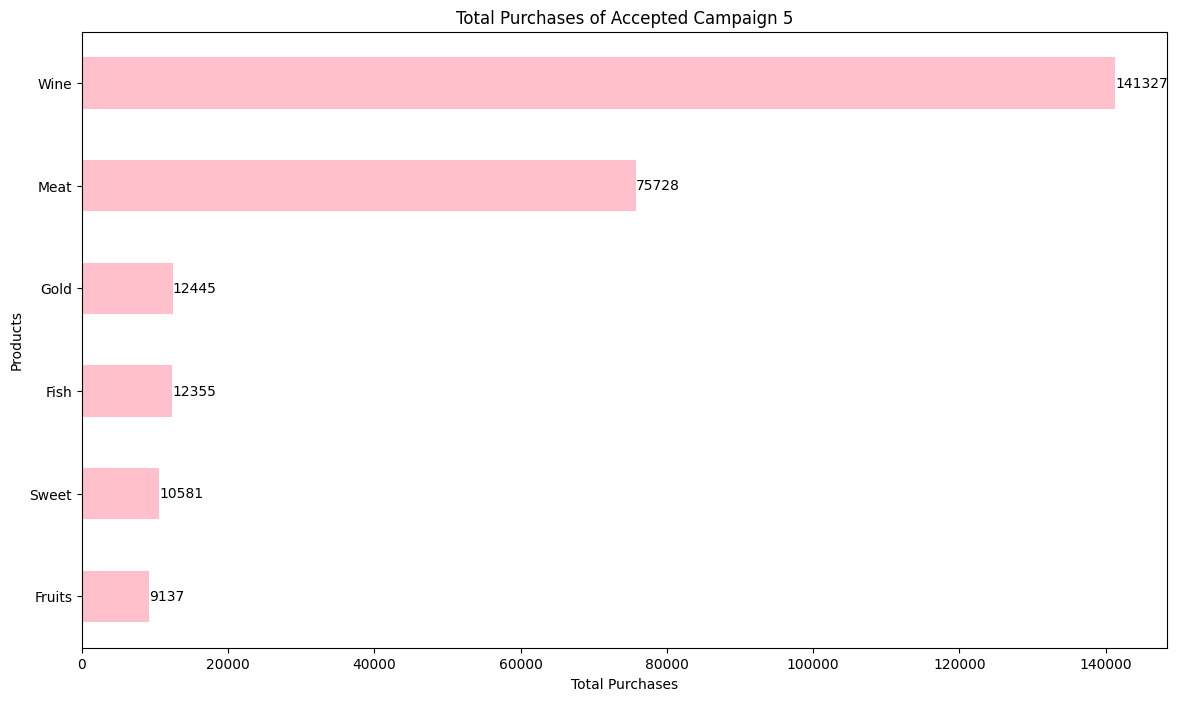

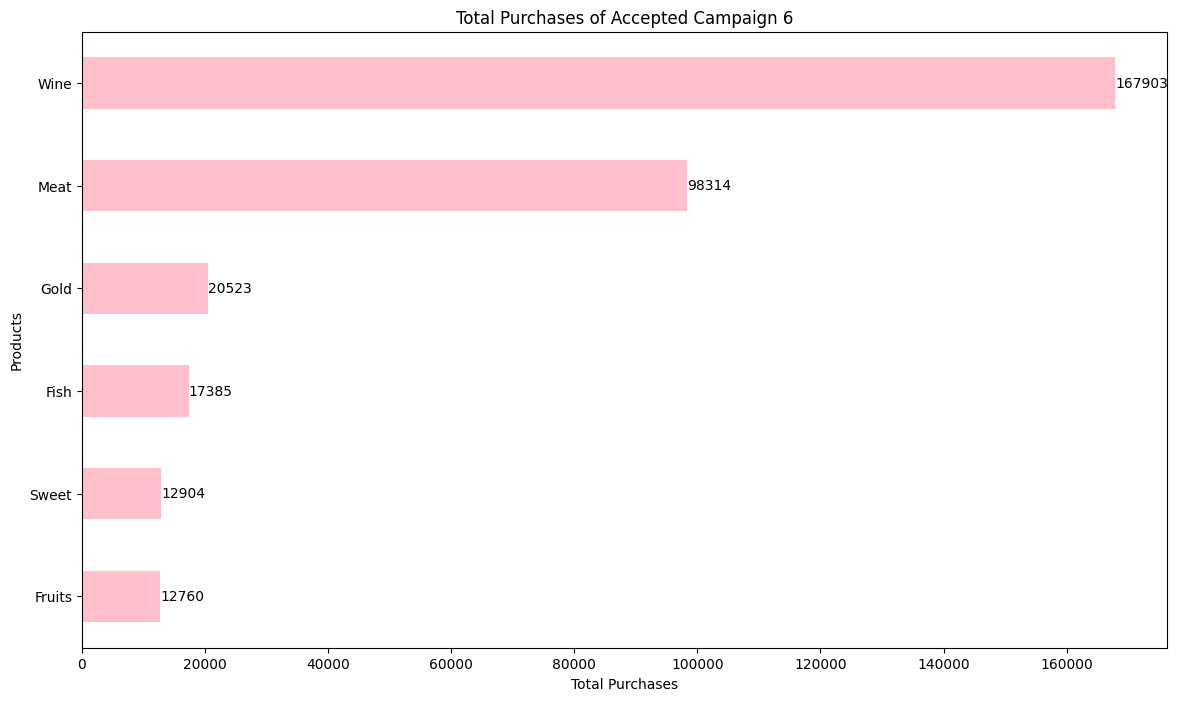

In [63]:
# List of Campaigns
manycmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Iterate through each campaign
for numbercmp, allcmp in enumerate(manycmp, start=1):
    # Filter DataFrame based on the current campaign
    cmp = df[df[allcmp] == 1]

    # Create a list to count the total purchase on each product category for accepted campaign 1
    total = {
        'Wine': cmp['MntWines'].sum(),
        'Fruits': cmp['MntFruits'].sum(),
        'Meat': cmp['MntMeatProducts'].sum(),
        'Fish': cmp['MntFishProducts'].sum(),
        'Sweet': cmp['MntSweetProducts'].sum(),
        'Gold': cmp['MntGoldProds'].sum()
    }

    # Convert to Series for plotting (because cannot make plot using dict)
    total_s = pd.Series(total)
    total_s = total_s.sort_values(ascending=True)

    # Create Barchart
    plt.figure(figsize=(14, 8))

    ax_cmp = total_s.plot(kind='barh', color='pink')
    plt.xlabel('Total Purchases')
    plt.ylabel('Products')
    plt.title(f'Total Purchases of Accepted Campaign {numbercmp}')
        
    for barcmp in ax_cmp.containers:
        ax_cmp.bar_label(barcmp)
            
        plt.show()

- Wine has the highest purchases in all campaigns.
- Fruits has the lowest purchases in all campaigns, except campaign 3 with sweet has the lowest purchases.
- Meat, Gold, Fish, Sweet, Wine, and Fruits have the highest purchases in the last campaign and have the lowest purchases in campaign 2, compared to other campaigns.

3. Is there a correlation between NumDealsPurchases (purchases with discounts) and number purchases in each place?

In [64]:
# Check p-value
placeNdeals = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

for pDeals in placeNdeals :
    p_val_Deals = sc.shapiro(df[pDeals])
    print(f'{pDeals} : {p_val_Deals}')

NumDealsPurchases : ShapiroResult(statistic=0.7466794808486595, pvalue=5.309568576523889e-50)
NumWebPurchases : ShapiroResult(statistic=0.8970004340350125, pvalue=2.7806318927241127e-36)
NumCatalogPurchases : ShapiroResult(statistic=0.841653073385987, pvalue=1.488264823644835e-42)
NumStorePurchases : ShapiroResult(statistic=0.9019743451227437, pvalue=1.3567539846888512e-35)


P-Value < 0.05 indicates the data is not normally distributed so the `non-parametric correlation test (Spearman)` will be used.

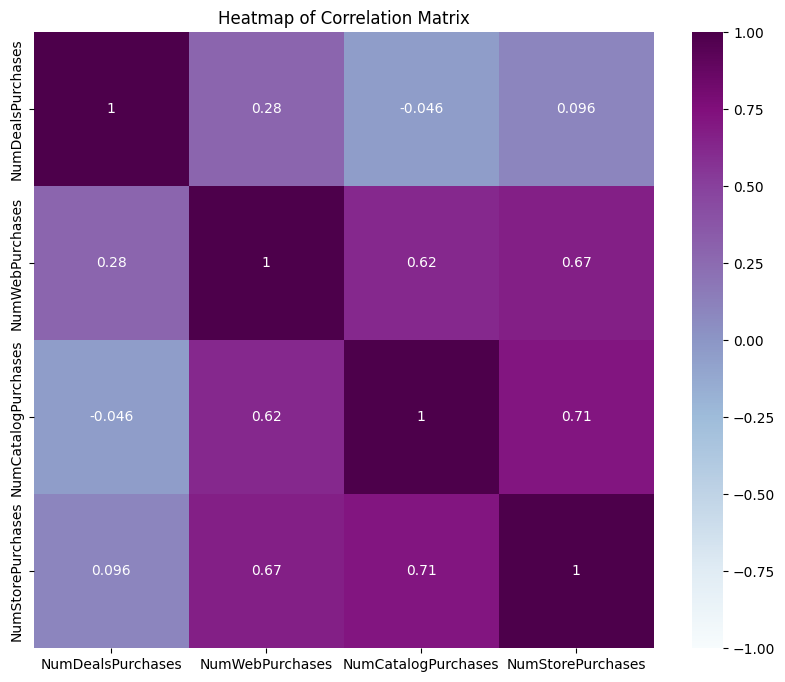

In [65]:
# Find the correlation
corr_matrix= df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

The strength of the correlation : 
https://datatab.net/tutorial/spearman-correlation

- 0.0 - <0.1	 -->   no correlation
- 0.1 - <0.3	 -->  low correlation
- 0.3 - <0.5	 -->  medium correlation
- 0.5 - <0.7	 -->   high correlation
- 0.7 - 1	 -->   very high correlation

- Coefficient between -1 and less than 0, there is a negative correlation 
- Coefficient greater than 0 and greater than 1, there is a positive correlation.

---

Based on heatmap, there is `low positive correlation` between number deals purchases and number web purchases. The High number of purchases with discounts is followed by the high number of purchases on the website, which means that many purchases with discounts can occur on the website.

While, there is `no correlation` between number deals purchases & number catalog purchases and number deals purchases & number store purchases.

**Complaint Handling**
1. How much the total of customer with complaint and without complaint?

In [66]:
# Total of customer complaint
sumcomp = df[df['Complain'] == 1].shape[0]
# Percentage of customer complaint
sumcomppercent = df[df['Complain'] == 1].shape[0]/2229*100
print(f'Total of consumer with complaint is {sumcomp}')
print(f'Percentage of consumer with complaint is {sumcomppercent:.2f}')

Total of consumer with complaint is 20
Percentage of consumer with complaint is 0.90


In [67]:
# Total of consumer not complaint
sumnotcomp = df[df['Complain']== 0].shape[0]
# Percentage of consumer complaint
sumnotcomppercent = df[df['Complain'] == 0].shape[0]/2229*100
print(f'Total of consumer not complaint is {sumnotcomp}')
print(f'Percentage of consumer not complaint is {sumnotcomppercent:.2f}')

Total of consumer not complaint is 2209
Percentage of consumer not complaint is 99.10


2. Which customer group (based on Age_Group and Income_Group) frequently complains?

In [68]:
df['Age_Group'].unique()

['Middle Age Adult', 'Elder', 'Adult', 'Teen']
Categories (4, object): ['Teen' < 'Adult' < 'Middle Age Adult' < 'Elder']

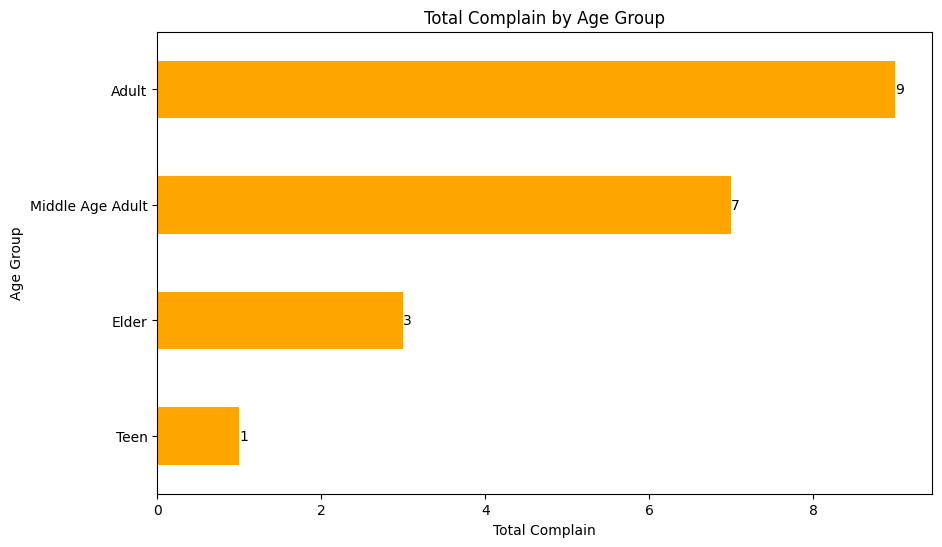

In [69]:
# Based on Age_Group
sumcomp = df[df['Complain'] == 1]

agetotal = {
    'Teen': sumcomp[sumcomp['Age_Group'] == 'Teen'].shape[0],
    'Adult': sumcomp[sumcomp['Age_Group'] == 'Adult'].shape[0],
    'Middle Age Adult': sumcomp[sumcomp['Age_Group'] == 'Middle Age Adult'].shape[0],
    'Elder': sumcomp[sumcomp['Age_Group'] == 'Elder'].shape[0]
    }

# Convert to Series for plotting
agetotal_s = pd.Series(agetotal)
agetotal_s = agetotal_s.sort_values(ascending=True)

# Create Barchart
plt.figure(figsize=(10, 6))

ax_comp = agetotal_s.plot(kind='barh', color='orange')
plt.xlabel('Total Complain')
plt.ylabel('Age Group')
plt.title('Total Complain by Age Group')

for barcomp in ax_comp.containers:
    ax_comp.bar_label(barcomp)

plt.show()

In [70]:
df['Income_Group'].unique()

['High', 'Upper Middle', 'Lower Middle']
Categories (4, object): ['Low' < 'Lower Middle' < 'Upper Middle' < 'High']

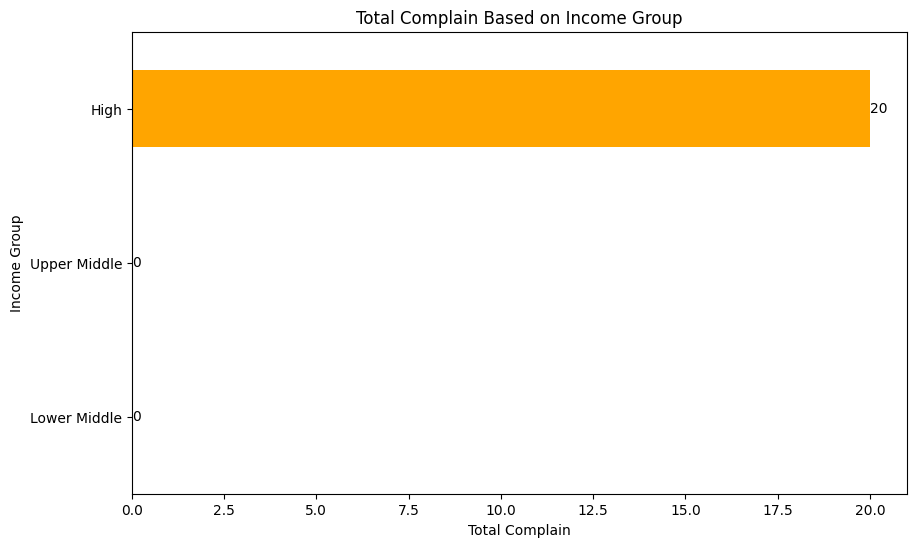

In [71]:
# Based on Education
sumcomp = df[df['Complain'] == 1]

incometotal = {
    'Lower Middle': sumcomp[sumcomp['Income_Group'] == 'Lower Middle'].shape[0],
    'Upper Middle': sumcomp[sumcomp['Income_Group'] == 'Upper Middle'].shape[0],
    'High': sumcomp[sumcomp['Income_Group'] == 'High'].shape[0]
    }

# Convert to Series for plotting
incometotal_s = pd.Series(incometotal)
incometotal_s = incometotal_s.sort_values(ascending=True)

# Create Barchart
plt.figure(figsize=(10, 6))

ax_ed = incometotal_s.plot(kind='barh', color='orange')
plt.xlabel('Total Complain')
plt.ylabel('Income Group')
plt.title('Total Complain Based on Income Group')

for bared in ax_ed.containers:
    ax_ed.bar_label(bared)

plt.show()

Customer who complain based on age group:
- 9 adults
- 7 middle age adults
- 3 elders
- 1 teenager

All consumers who complain come from customers with high income.

3. What is the total purchase from customers who complain for each product type? 

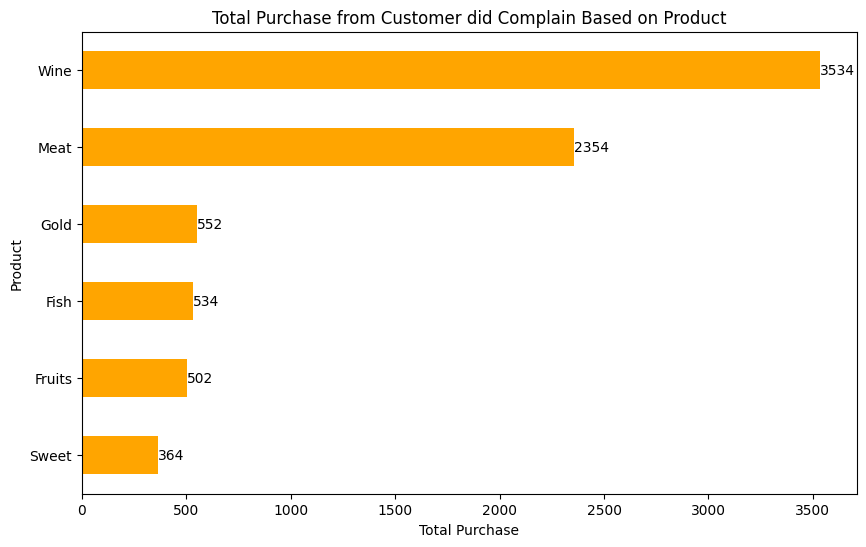

In [72]:
# Based on Education
sumcomp = df[df['Complain'] == 1]

prodtotal = {
    'Wine': sumcomp['MntWines'].sum(),
    'Fruits': sumcomp['MntFruits'].sum(),
    'Meat': sumcomp['MntMeatProducts'].sum(),
    'Fish': sumcomp['MntFishProducts'].sum(),
    'Sweet': sumcomp['MntSweetProducts'].sum(),
    'Gold': sumcomp['MntGoldProds'].sum()
    }

# Convert to Series for plotting
prodtotal_s = pd.Series(prodtotal)
prodtotal_s = prodtotal_s.sort_values(ascending=True)

# Create Barchart
plt.figure(figsize=(10, 6))

ax_prod = prodtotal_s.plot(kind='barh', color='orange')
plt.xlabel('Total Purchase')
plt.ylabel('Product')
plt.title('Total Purchase from Customer did Complain Based on Product')

for barprod in ax_prod.containers:
    ax_prod.bar_label(barprod)

plt.show()

The highest total purchases based on products from customer who complaint is wine purchases.

- Wine purchases from consumers who complaint is 3534.
- Meat purchases from consumers who complaint is 2354.
- Gold purchases from consumers who complaint is 552.
- Fish purchases from consumers who complaint is 534.
- Fruits purchases from consumers who complaint is 502.
- SWeet purchases from consumers who complaint is 364.

4. What is the total number of purchase from customers who complaint for each type of marketplace (Website, Catalog, and Store)?

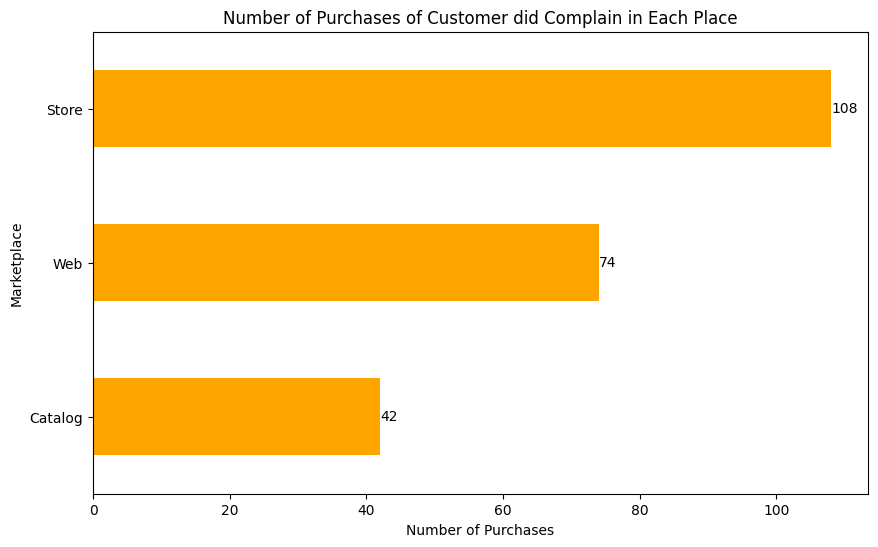

In [73]:
# Based on marketplace
sumcomp = df[df['Complain'] == 1]

markettotal = {
    'Web': sumcomp['NumWebPurchases'].sum(),
    'Catalog': sumcomp['NumCatalogPurchases'].sum(),
    'Store': sumcomp['NumStorePurchases'].sum()
    }

# Convert to Series for plotting
markettotal_s = pd.Series(markettotal)
markettotal_s = markettotal_s.sort_values(ascending=True)

# Create Barchart
plt.figure(figsize=(10, 6))

ax_market = markettotal_s.plot(kind='barh', color='orange')
plt.xlabel('Number of Purchases')
plt.ylabel('Marketplace')
plt.title('Number of Purchases of Customer did Complain in Each Place')

for barmarket in ax_market.containers:
    ax_market.bar_label(barmarket)

plt.show()


- The total number of purchase in Store from consumers who complaint is 108. 
- The total number of purchase in Store from consumers who complaint is 74. 
- The total number of purchase in Store from consumers who complaint is 42.

## **Conclusion & Recommendation**

**Conclusion**

**Customer Segmentation**

The most suitable customer segments to target are:
1. Middle Age Adult customer (40 - 59 years old)
2. Bachelor’s degree customer
3. Married customer
4. customer with child
5. High Income Customer, with income range of 14006 - 113734

**Product Sales**
1. Most of customers are active customers who have made purchases in the last 90 days, with a total of 2033 customers (91.21% of total customers), the other 8.79% are passive customers.
2. Customers who complain are not related to passive customers.
3. Wine is a product with the highest total sales, while Fruits is a product with the lowest total sales.
4. Higher customer's income affecting to higher sales of all products, especially for wine and meat products. Customers with higher income more like to buy Wine and Meat products.
5. Customers with higher Age Group more like to buy Wine products.

**Store & Marketplace Performance**
1.  Store has the highest sales performance, while catalog has the lowest sales performance based on the number of purchases by customers.
2. Store is the most preferred place by all customers, Web is the most not preferred place by Teens, and Catalog is the most not preferred place by Adult; Middle Age Adult; and Elder.
3. The total web visit by customers is 11890 times, but customers who visit the web do not immediately make purchases.

**Promotion Effectiveness**
1.  The latest campaign is the most effective campaign for all products based on total purchases by customer, while campaign 2 is the most not effective for all products.
2. All campaigns is the most effective campaign for wine products based on the highest total purchases of wine out of all products.
3. Most purchases with discounts occur more often through website purchases rather than purchases in catalogs and stores.

**Complaint Handling**
1. Total customer with complaint is 20 customer (0.9% of total customer), it shows that most of customer didn't complaint to supermarket.
2. Most complains is from adult customers with high income.
3. If complaints are not handled well, the supermarket will lose revenue soon as much as:
- 3534 from wine products
- 2354 from meat products
- 552 from gold products
- 534 from fish products
- 502 from fruit products
- 364 from sweet products
4. Store has the highest total number of purchase from consumers who complaint.

**Recommendation**

**Customer Segmentation**
1. Maintain existing customer segmentation target with the following demographic characteristics:
- Middle Age Adult customer (40 - 59 years old)
- Bachelor’s degree customer
- Married customer
- Customer with child
- High Income Customer, with income range of 14006 - 113734

2. Expanding the reach of customer segmentation that has not yet been achieved based on purchases activity, especially for customers with the following demographic characteristics:
- Teen (13 - 20 years old)
- Basic (high school or below) as last education
- Single as marital status
- Living without child
- Lower Middle Income (1146 - 4515)

**Product Sales**
1. Provide more inventory for high-selling products (wine and meat).
2. Ensure stocks of Gold, Fish, Sweet and Fruits products not exceed those of products with high sales to avoid having an abundance of leftover products, especially fruit products with the lowest sales.
3. The high and low of product sales are closely related to the target customer segmentation that is owned. To significantly increase sales of products other than wine and meat, it is necessary to follow up with expanding customer segmentation.
4. Design a bundle package with a cross combination of products with high sales (wine and meat) and products with low sales (Gold, Fish, Sweet and Fruits). For example, a meat and fruit bundle package.

**Store & Marketplace Performance**
1.  Get customer feedback to increase web performance based on customer experience or implement these steps :
- Improve website navigation, such as offering simple navigation to the main pages, giving filter options (by product, price, etc), and give functional menu (wishlists, add to cart, etc).
- Simplify the check out process
- Accept alternative payment (debit and credit card, e-wallet, etc)
- Offer free shipping for early users.

2. Increase catalog performance through implement these steps :
- create comprehensive product descriptions in digital catalog (price, size, best before date of product, etc)
- Connect website to digital catalog to drive more traffic to website, it can improve its ranking in search engine results and can track which sale was driven by catalog.

3. Maintain store performance and use it to increase product sales :
- Adding an offline marketing (such as poster platform) using weather parameters to increase sales of targeted product, such as summer fruits (berry, mango, papaya, watermelon, etc) is better sold on a hot summer day than on rainy days.

**Promotion Effectiveness**
1. Maintaning the latest campaign as the most affective campaign for all products.
2. Stopping campaign 2 because giving the lowest accepted offer of customer.

**Complaint Handling**
1. Indentificating and getting the reason of complaint from customer feedback, especially for purchasing in store from adult customers with high income as the most customer doing complaint.
2. If it is the customer’s fault, apologizing for the frustration and confusion the customer is facing, after that giving some solutions that customer needs, such as information and explanation for the problem of customer.
3. If it is supermarket's fault (such as product or service failure), offer compensation such as discount 5% for the next purchases.
4. Train and empower employees to handle complaints effectively.
5. Get some feedback or reviews to identify weaknesses of products or services and improve it to prevent complaints on subsequent sales.

---

Based on those recommendations, supermarket can implement fit segmentation, clear plan of product sales, good performance of the marketplace or store, targetted marketing campaigns, and good response and prevention of complaints, so that supermarket can easily `gain customer loyalty, increase sales, and optimize promotion to boost supermarket profit.`